In [1]:
import numpy as np
import os
import glob
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Load the times related to the hourly data for each catchment grid cell 
times = np.load('RainfallData/times_jja.npy', allow_pickle=True)

# Get a list of all the individual grid cell JJA .npy files
jja_npy_files = glob.glob('RainfallData/*_jja.npy')
jja_npy_files = jja_npy_files[:-2]

# Create an array to store the daily values for all the grid cells in the catchment
all_daily_sums = np. array([])

# Add the daily data for each grid cell
for file in jja_npy_files:
    one_cell = np.load(file, allow_pickle = True)
    df = pd.DataFrame({'Dates': pd.to_datetime(times), 'Precipitation': one_cell})
    daily_sums = df.set_index('Dates').resample('D')['Precipitation'].sum()
    all_daily_sums = np.append(all_daily_sums, daily_sums)

In [54]:
# # Add the daily data for each grid cell
# for file in jja_npy_files:
#     one_cell = np.load(file, allow_pickle = True)
#     df = pd.DataFrame({'Dates': pd.to_datetime(times), 'Precipitation': one_cell})
#     daily_sums = df.set_index('Dates').resample('D')['Precipitation'].sum()
#     print(np.mean(daily_sums))

In [4]:
# Find the mean daily precipitation values across the area covering the catchment 
np.mean(all_daily_sums)
np.percentile(all_daily_sums, 97)
# np.percentile(all_daily_sums, 90.5)
# np.percentile(all_daily_sums, 25)

5.199999809265137

(array([1.60604e+05, 3.89600e+03, 1.59000e+03, 8.07000e+02, 5.30000e+02,
        2.92000e+02, 1.48000e+02, 1.00000e+02, 1.07000e+02, 6.90000e+01,
        4.70000e+01, 1.30000e+01, 3.30000e+01, 2.50000e+01, 6.00000e+00,
        1.00000e+01, 9.00000e+00, 2.10000e+01, 9.00000e+00, 5.00000e+00]),
 array([ 0.        ,  3.23499985,  6.46999969,  9.70499954, 12.93999939,
        16.17499924, 19.40999908, 22.64499893, 25.87999878, 29.11499863,
        32.34999847, 35.58499832, 38.81999817, 42.05499802, 45.28999786,
        48.52499771, 51.75999756, 54.99499741, 58.22999725, 61.4649971 ,
        64.69999695]),
 <BarContainer object of 20 artists>)

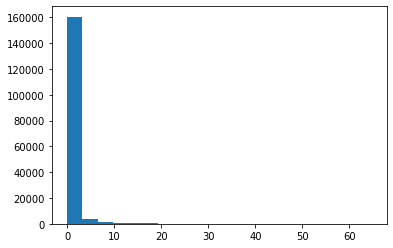

In [55]:
def unique(list1):
    x = np.array(list1)
    print(np.unique(x))
    
# unique(all_daily_sums)
plt.hist(all_daily_sums, bins = 20)